In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
from matplotlib import pyplot as plt

df = pd.read_csv("ml score.csv")
df.sample(5)

,Libraries,Statistics,Basic maths,supervised algorithms,unsupervised algorithms,semi-supervised algorithms,reinforced algorithm,ML score
452,1,1,1,1,1,1,1,83.165708
97,1,1,0,1,0,0,1,57.844372
147,1,0,0,0,0,1,0,28.886397
317,0,0,1,0,0,0,1,24.980591
832,0,0,1,0,0,0,1,16.962639


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Libraries                   1000 non-null   int64  
 1   Statistics                  1000 non-null   int64  
 2   Basic maths                 1000 non-null   int64  
 3   supervised algorithms       1000 non-null   int64  
 4   unsupervised algorithms     1000 non-null   int64  
 5   semi-supervised algorithms  1000 non-null   int64  
 6   reinforced algorithm        1000 non-null   int64  
 7   ML score                    1000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2 to 995
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Libraries                   443 non-null    int64  
 1  

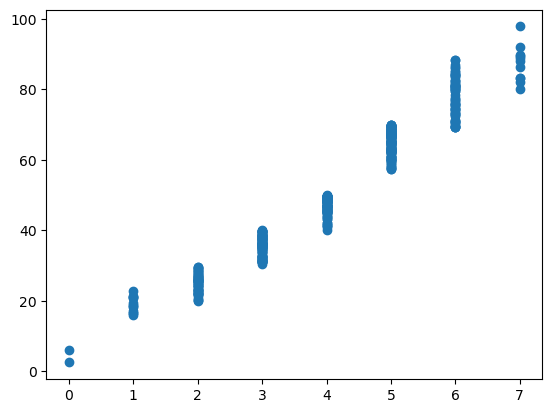

In [6]:
df.info()
df['sum'] = df[['Libraries',	'Statistics',	'Basic maths',	'supervised algorithms',	'unsupervised algorithms',	'semi-supervised algorithms'	,'reinforced algorithm']].sum(axis = 1)
# Combined condition for filtering
conditions = (
    (df['sum']== 0 ) & (df['ML score'] > 0) |
    (df['sum'] == 1) & (df['ML score'] > 15) |
    (df['sum'] == 2) & (df['ML score'] < 30) & (df['ML score'] > 20) |
    (df['sum'] == 3) & (df['ML score'] <= 40) & (df['ML score'] > 30) |
    (df['sum'] == 4) & (df['ML score'] > 40) & (df['ML score'] < 50) |
    (df['sum'] == 5) & (df['ML score'] > 57) & (df['ML score'] < 70)|
    (df['sum'] == 6) & (df['ML score'] > 68) |
    (df['sum'] == 7) & (df['ML score'] > 80)
)
df = df[conditions]
df.head(10)
df.info()
plt.scatter(df['sum'],df['ML score'])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test = train_test_split(df.drop(columns = ['ML score','sum']),df['ML score'],test_size = 0.2)
X_train

,Libraries,Statistics,Basic maths,supervised algorithms,unsupervised algorithms,semi-supervised algorithms,reinforced algorithm
678,1,0,0,0,1,0,0
219,1,0,1,0,0,0,1
830,0,1,1,1,0,1,0
880,0,1,1,0,0,0,1
732,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...
981,1,1,0,0,0,0,0
900,0,1,1,0,0,0,1
112,1,1,1,0,0,1,1
533,1,1,1,0,0,0,1


In [8]:
len(X_train) , len(X_test)

(354, 89)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train , y_train)

RandomForestRegressor()

In [10]:
# Predict on the test data
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 2.6147026179170347
Mean Squared Error (MSE): 13.430934806429748
Root Mean Squared Error (RMSE): 3.664823980279237
R-squared (R²): 0.9616191646943058


In [11]:
df.columns

Index(['Libraries', 'Statistics', 'Basic maths', 'supervised algorithms',
       'unsupervised algorithms', 'semi-supervised algorithms',
       'reinforced algorithm', 'ML score', 'sum'],
      dtype='object')

In [12]:
model.predict([[1,1,1,1,1,1,0]])

c:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([77.81802826])

In [13]:

model.predict([[0,0,0,0,0,0,0]])

c:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.17415802])

In [14]:
model.predict([[1,0,1,0,1,0,0]])

c:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([37.06475655])

In [15]:
import pickle as pickle

In [16]:
with open('model_pickle_new','wb') as file:
    pickle.dump(model,file)
    

In [17]:
# loading saved model
with open('model_pickle_new','rb') as file:
    mp = pickle.load(file)

In [18]:
mp.predict([[1,1,1,1,1,1,1]])

c:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([87.01411448])

c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sum'>

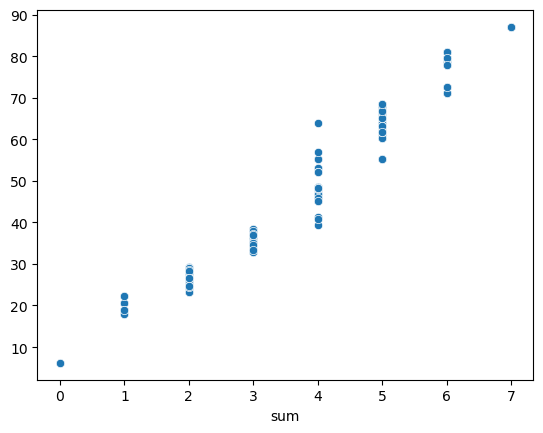

In [19]:
import seaborn as sns
y_pred = mp.predict(df.drop(columns = ['ML score','sum']))
sns.scatterplot(x = df['sum'],y = y_pred)
